# CS 401/501 Final - Author KNN Analysis

## Introduction

In this project the problem we have been assigned is to create a **KNN** - *K-Nearest-Neighbors* classification algorithm to classify works of authors. What this means is that we will be taking 5 works from 2 authors each, analyzing them for their word usage, in hopes to create an algorithm that is able to determine the correct author of two more books that we will be introducing to it.

The way I intend to solve the problem is to take the known works of authors and categorize them into their usage of the words `should`, `could`, and `would`.
Since these are words that can often be swapped out in place of one another, the hope is that there will be enough bias in the author's choosing as to create a way to assign unknown works to their respective authors.

The two authors I have chosen are **Charles Dickens** and **Mark Twain**, both who are world renown novelists from the 1800's.
I collected their works through the use of **Project Gutenburg**, which can be found at https://www.gutenberg.org



## The Data

The raw text taken from Gutenburg has been slighly edited to fit the orginal text (copywright and other things that could skew the data have been removed). 

Then through the use of the script `author_parse.py` the data for each book was turned into a csv file consisting of the chosen words (`should`, `could`, and `would`) in the format `book should, could, would` as the header row, and the data following in the next column.

As for how the program accomplishes this:

`urllib.request.urlopen()` is used to open up the text files of each book stored in `https://cs.indstate.edu/~cs50121/authors`

The data is then read and decoded into **utf-8** format, and turned into lowercase.
The program then makes use of `re.compile()` and `re.findall()` to create **regex** searches of the data in order to grab all of our matching words.

The words are then stored in a dictionary in format `Word:Occurences`, which is then turned into `Word:Frequencies` by dividing by the total amount of words in the respective book. 

Lastly, the script `make_csv.sh` calls `author_parse.py` and passes in all of the text files for the books into it, turns the outputs into csv files, and stores them in `https://cs.indstate.edu/~cs50121/authors`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Initialze lists of books for authors A and B, fill them with the csv data of their books
# Also create unknownA and unknownB for our "unknown" books

authorA, authorB = [], []
for i in range(1, 6):
    
    stringA = "https://cs.indstate.edu/~cs50121/authors/a" + str(i) + ".csv"
    stringB = "https://cs.indstate.edu/~cs50121/authors/b" + str(i) + ".csv"
    
    authorA.append(pd.read_csv(stringA, header=0))
    authorB.append(pd.read_csv(stringB, header=0))
    
unknownA = pd.read_csv("https://cs.indstate.edu/~cs50121/authors/ua.csv", header=0)
unknownB = pd.read_csv("https://cs.indstate.edu/~cs50121/authors/ub.csv", header=0)

## Exploring the Data

First we imported the data through the use of pandas.read_csv(), and next we will explore it through the use of some built in pandas functions below.

In [4]:
data = authorA[0]
data.describe()

,would,could,should
count,1.0000,1.0000,1.0000
mean,0.4823,0.3878,0.2594
std,NaN,NaN,NaN
min,0.4823,0.3878,0.2594
25%,0.4823,0.3878,0.2594
50%,0.4823,0.3878,0.2594
75%,0.4823,0.3878,0.2594
max,0.4823,0.3878,0.2594


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   book    1 non-null      object 
 1   would   1 non-null      float64
 2   could   1 non-null      float64
 3   should  1 non-null      float64
dtypes: float64(3), object(1)
memory usage: 160.0+ bytes


In [6]:
data.head()

,book,would,could,should
0,a1,0.4823,0.3878,0.2594


## Dimensions of Analysis

This next chart shows our dimensions of analysis and data in full. In other words, this is the entire data set we will be working with from here on out when it comes to visualizing and implementing our KNN analysis.

In [7]:
test = pd.DataFrame()
atable = pd.DataFrame()
btable = pd.DataFrame()

for i in authorA:
    test = pd.concat([test, i])
    atable = pd.concat([atable, i])
for i in authorB:
    test = pd.concat([test, i])
    btable = pd.concat([btable, i])
    
test = pd.concat([test, unknownA])
test = pd.concat([test, unknownB])
test.set_index("book")

,would,could,should
book,,,
a1,0.4823,0.3878,0.2594
a2,0.6753,0.5493,0.4621
a3,0.6012,0.4478,0.1902
a4,0.5104,0.3414,0.2779
a5,0.5772,0.3926,0.2877
b1,1.1086,0.9842,0.0539
b2,0.7592,0.5278,0.0936
b3,0.4866,0.2636,0.2154
b4,0.9308,0.7931,0.2707


## Visualization

Next we will visualize the data by using graphs. Since the data is already in the form of percentages and relatively the same margins, no normalization will be necessary.

**AuthorA** is shown in red, and **AuthorB** in blue. The unknown works A and B are shown in green and orange, respectively.

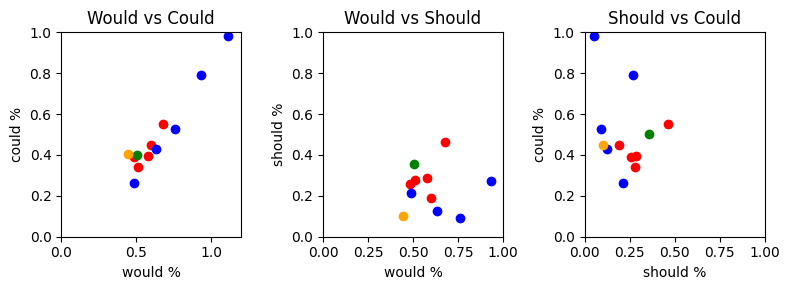

In [8]:
fig = plt.figure(figsize=(8, 3))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Would vs Could")
ax2.set_title("Would vs Should")
ax3.set_title("Should vs Could")

ax1.scatter(atable['would'], atable['could'], color="red", label="Author 1")
ax1.scatter(btable['would'], btable['could'], color="blue", label="Author 2")
ax1.scatter(unknownA['would'], unknownA['could'], color="green", label="Author 2")
ax1.scatter(unknownB['would'], unknownB['could'], color="orange", label="Author 2")
ax1.set_xlabel("would %")
ax1.set_ylabel("could %")
ax1.legend
ax1.set_xlim((0, 1.2))
ax1.set_ylim((0, 1))

ax2.scatter(atable['would'], atable['should'], color="red", label="Author 1")
ax2.scatter(btable['would'], btable['should'], color="blue", label="Author 2")
ax2.scatter(unknownA['would'], unknownA['should'], color="green", label="Author 2")
ax2.scatter(unknownB['would'], unknownB['should'], color="orange", label="Author 2")
ax2.set_xlabel("would %")
ax2.set_ylabel("should %")
ax2.legend
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

ax3.scatter(atable['should'], atable['could'], color="red", label="Author 1")
ax3.scatter(btable['should'], btable['could'], color="blue", label="Author 2")
ax3.scatter(unknownA['should'], unknownA['would'], color="green", label="Author 2")
ax3.scatter(unknownB['should'], unknownB['would'], color="orange", label="Author 2")
ax3.set_xlabel("should %")
ax3.set_ylabel("could %")
ax3.legend
ax3.set_xlim((0, 1))
ax3.set_ylim((0, 1))

fig.tight_layout()

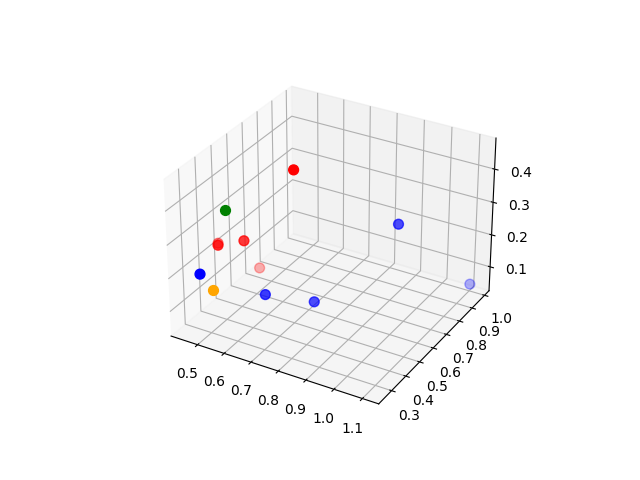

In [9]:
%matplotlib widget
axes = [ax1, ax2, ax3]

PT_SIZE = 50

ax = plt.axes(projection="3d")

ax.scatter3D(atable['would'], atable['could'], atable['should'], s=PT_SIZE, color="red")
ax.scatter3D(btable['would'], btable['could'], btable['should'], s=PT_SIZE, color="blue")
ax.scatter3D(unknownA['would'], unknownA['could'], unknownA['should'], s=PT_SIZE, color="green")
ax.scatter3D(unknownB['would'], unknownB['could'], unknownB['should'], s=PT_SIZE, color="orange")

## The KNN Analysis

Next we will be choosing our k value and creating 4 KNN Analyses.

The distance function we will be using is very simple: linear distance. This can be found by the following equation:

$$
d() = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}
$$

This makes the most sense to me as it is just a simple check to see how closely the unknown works match up to those of authors A and B. I really don't see a more logical way of doing it.

As for our next steps:<br />
    **1.** Initialze some lists and values to use for our functions (the data right now needs to be converted into a more usable format)<br /><br />
    **2.** Fill the new lists and values with the old data (iterate through the old data and convert to our new form)<br /><br />
    **3.** Create our distance and neighbor functions. The distance functions will be used to simply find distances between each work and the unknown work, while the neighbor functions make use of the distance functions and turn it into a tuple of data to use later.<br /><br />
    **4.** Run our data through the functions and sort it. This should give us the data for finding the nearest neighbors.<br /><br />
    **5.** Implement our KNN with our chosen K values. This is a simple as iterating through our neighbor data, looking at the first K, and making note of which authors the work is closest to.<br /><br />
    **6.** Once we have our results, we simply take a look at them and determine which authors we think the unknown works belong to.

In [10]:
#Make 5 total analyses
# choose 2 k values
# Plot 
# 1: aa, ab, ua, k1
# 2: aa, ab, ub, k1
# 3: aa, ab, ua, k2

# 4: aa, ab, ub, k2

In [11]:
#Initialize lists for frequency values of each word for both authors, as well as a list of the words
awould, acould, ashould = [], [], []
bwould, bcould, bshould = [], [], []
uawould, uacould, uashould = unknownA['would'][0], unknownA['could'][0], unknownA['should'][0]
ubwould, ubcould, ubshould = unknownB['would'][0], unknownB['could'][0], unknownB['should'][0]
words = ['would', 'could', 'should']

#Iterate through the tables and add the values into the new corresponding lists, for each author.
for word in words:
    for i in atable[word]:
        if word == 'would':
            awould.append(i)
        elif word == 'could':
                acould.append(i)
        else:
            ashould.append(i)
    
    for i in btable[word]:
        if word == 'would':
            bwould.append(i)
        elif word == 'could':
                bcould.append(i)
        else:
            bshould.append(i)

In [12]:
#Define our distance equations, one for finding distance from unknown work A, and one for unknown work B

def distanceA(x, y, z):
    return np.sqrt( (uawould -x)**2 + (uacould-y)**2 + (uashould-z)**2 )

def distanceB(x, y, z):
    return np.sqrt( (ubwould -x)**2 + (ubcould-y)**2 + (ubshould-z)**2 )

In [13]:
#Same with the distance functions, make two neighbor functions that use distanceA and distanceB respectively.

# Neighbor -> (distance to unknown, x, y, classification)

def neighborA(label, x, y, z):
    return (distanceA(x, y, z), x, y, z, label)

def neighborB(label, x, y, z):
    return (distanceB(x, y, z), x, y, z, label)

In [16]:
# Implement the functions and store the data in a list
# with each entry being in the format: (distance, x, y, z, label)

neighborsA = [ neighborA("Author A", awould[i], acould[i], ashould[i]) for i in range(5)]
neighborsA += [ neighborA("Author B", bwould[i], bcould[i], bshould[i]) for i in range(5)]
neighborsA.sort()

neighborsB = [ neighborB("Author A", awould[i], acould[i], ashould[i]) for i in range(5)]
neighborsB += [ neighborB("Author B", bwould[i], bcould[i], bshould[i]) for i in range(5)]
neighborsB.sort()
neighborsB

[(0.16329990814449347, 0.4823, 0.3878, 0.2594, 'Author A'),
 (0.1839422463709737, 0.6012, 0.4478, 0.1902, 'Author A'),
 (0.1847611160390627, 0.4866, 0.2636, 0.2154, 'Author B'),
 (0.1887047429186664, 0.6325, 0.4275, 0.1243, 'Author B'),
 (0.19802610938964585, 0.5104, 0.3414, 0.2779, 'Author A'),
 (0.22815166008600507, 0.5772, 0.3926, 0.2877, 'Author A'),
 (0.33642489503602435, 0.7592, 0.5278, 0.0936, 'Author B'),
 (0.4518954303818528, 0.6753, 0.5493, 0.4621, 'Author A'),
 (0.6444495713397597, 0.9308, 0.7931, 0.2707, 'Author B'),
 (0.8820129364130664, 1.1086, 0.9842, 0.0539, 'Author B')]

## Combing through the Data

After implementing our functions and getting the data back from them, the last thing to do is to see which authors the unknown works are closest to, with the limit of neighbor checks being equal to k.

In this case, I have chosen 5 and 7 as the values for k. I chose these values simply because 5 covers half of the list, and 7 goes a bit further just to see if things change with a couple of more checks added in.

In [47]:
k1, k2 = 5, 7
kvals = [k1, k2]
#Counters for unkown work A neighbors for both k values (kval-author_unknown work)
k1a_workA, k1b_workA, k2a_workA, k2b_workA = 0, 0, 0, 0

#Counters for unkown work B neighbors for both k values
k1a_workB, k1b_workB, k2a_workB, k2b_workB = 0, 0, 0, 0

# Plug in both kvals for unknown A
for i in kvals:
    for j in range(i):
        if(i == k1):
            if neighborsA[j][4] == 'Author A':
                k1a_workA += 1
            else:
                k1b_workA += 1
        if(i == k2):
            if neighborsA[j][4] == 'Author A':
                k2a_workA += 1
            else:
                k2b_workA += 1

# Plug in both kvals for unknown B
for i in kvals:
    for j in range(i):
        if(i == k1):
            if neighborsB[j][4] == 'Author A':
                k1a_workB += 1
            else:
                k1b_workB += 1
        if(i == k2):
            if neighborsB[j][4] == 'Author A':
                k2a_workB += 1
            else:
                k2b_workB += 1

#(k1a = k1 value analysis for work A)

k1a = "Author A" if k1a_workA > k1b_workA else "Author B" #k1 for work A
k2a = "Author A" if k2a_workA > k2b_workA else "Author B" #k2 for work A
k1b = "Author A" if k1a_workB > k1b_workB else "Author B" #k1 for work B
k2b = "Author A" if k2a_workB > k2b_workB else "Author B" #k2 for work B

## The Results

As we can see from the results below, our analysis worked for the unknown work A with both values (5 and 7) of K, as they correctly identified the author as **Author A**.

However, for unknown work B, this was not the case. Both analyses for K values 5 and 7 determined that the "correct" author was Author A, **not Author B**. This, of course, is not the actual case.

I think the reason my KNN Analysis failed to determine the correct author was mostly due to *word choice*.

I think there was probably a better combination of words to choose from in order to determine an author. While the word choice worked very well for Author A (lots of grouping) this was note the case for Author B, as their word choice was much more spread out (from this relative perspective) to correctly identify them.

In [48]:
print(f"K1 Analysis for work A: {k1a}")
print(f"K2 Analysis for work A: {k2a}")
print(f"K1 Analysis for work B: {k1}")
print(f"K2 Analysis for work B: {k2b}")

K1 Analysis for work A: Author A
K2 Analysis for work A: Author A
K1 Analysis for work B: Author A
K2 Analysis for work B: Author A


## One Final Plot of the Data

As you can see in this final plot of the data, our **KNN analysis worked** in this scenario. Unknown work A (really a sixth work of author A) was correctly identified as belonging to author A as shown by the k2 (7) connections to its neighbors.

Text(0.5, 0, 'should %')

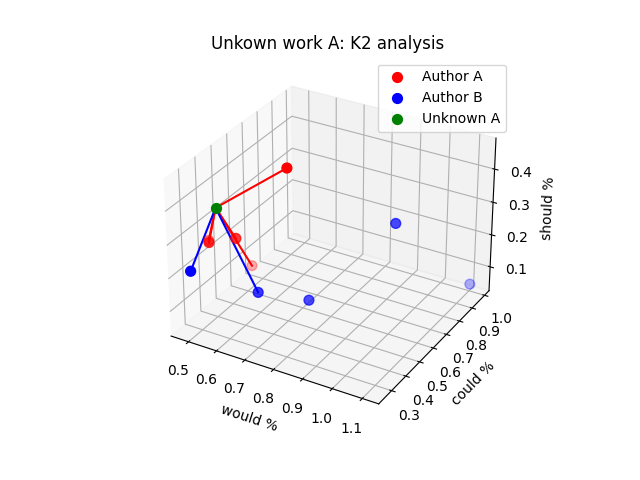

In [55]:
%matplotlib widget
axes = [ax1, ax2, ax3]

PT_SIZE = 50

ax = plt.axes(projection="3d")

ax.scatter3D(atable['would'], atable['could'], atable['should'], s=PT_SIZE, color="red", label="Author A")
ax.scatter3D(btable['would'], btable['could'], btable['should'], s=PT_SIZE, color="blue", label="Author B")
ax.scatter3D(unknownA['would'], unknownA['could'], unknownA['should'], s=PT_SIZE, color="green", label="Unknown A")

# Neighbors
for i in range(k2):
    n = neighborsA[i]
    x = [unknownA['would'][0], n[1]]
    y = [unknownA['could'][0], n[2]]
    z = [unknownA['should'][0], n[3]]
    color = "red" if n[4] == "Author A" else "blue"
    plt.plot(x, y, z, c=color)

plt.legend()
plt.title("Unkown work A: K2 analysis")
plt.xlabel("would %")
plt.ylabel("could %")
ax.set_zlabel("should %")